# Drowsiness detection
## The objective of this intermediate Python project is to build a drowsiness detection system that will detect that a person’s eyes are closed for a few seconds. This system will alert the driver when drowsiness is detected.

### Importing neccessary  libraries

In [8]:
import os
import numpy as np
import pandas as pd
import cv2

### Loading Data

In [9]:
labels = os.listdir("C:\\Prerana\\Prerana PY\\train")

### This dataset contains images grouped into four categories:- Closed,Open,Yawn,No yawn

In [10]:
labels

['Closed', 'no_yawn', 'Open', 'yawn']

### Dataset example

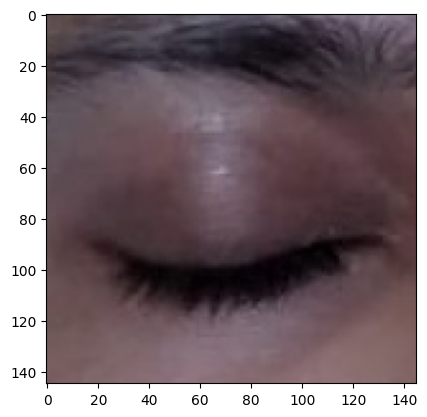

In [34]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(r"C:\Prerana\Prerana PY\train\Closed\_0.jpg"))

In [8]:
a = plt.imread(r"C:\Prerana\Prerana PY\train\yawn\1.jpg")
a

array([[[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       ...,

       [[154, 169, 192],
        [155, 170, 193],
        [154, 169, 192],
        ...,
        [213, 180, 161],
        [215, 182, 163],
        [217, 184, 165]],

       [[154, 169, 192],
        [154, 169, 192],
        [153, 168, 191],
        ...,
        [212, 179, 160],
        [213, 180, 161],
        [214, 181, 162]],

       [[153, 168, 191],
        [153, 168, 191],
        [152, 167, 190],
        ...,
        [213, 180, 161],
        [213, 180, 161],
        [213, 180, 161]]

In [9]:
a.shape

(480, 640, 3)

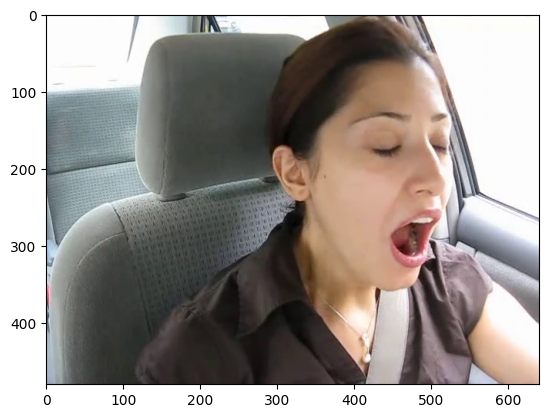

In [10]:
plt.imshow(plt.imread(r"C:\Prerana\Prerana PY\train\yawn\1.jpg"))

In [11]:
import cv2
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from keras import regularizers
from sklearn.model_selection import train_test_split

### This code processes images in the specified directory, detects faces, and prepares data for a classification task related to yawning detection. The Haar cascade classifier is used for face detection, and the resized face images are stored in the yawn_no_yawn list.

In [12]:
def face_for_yawn(direc=r"C:\Prerana\Prerana PY\train", face_cas_path=r"C:\Prerana\Prerana PY\haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
1


In [13]:
def get_data(dir_path=r"C:\Prerana\Prerana PY\train", face_cas=r"C:\Prerana\Prerana PY\haarcascade_frontalface_default.xml", eye_cas=r"C:\Prerana\Prerana PY\haarcascade_frontalface_default.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [14]:
data_train = get_data()

2
3


### Here we have appended both the list into a new list named New data

In [15]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no, dtype=object )
    #arr = np.array(data, dtype=object)

In [16]:
new_data = append_data()

0
1
2
3


In [17]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

In [18]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [19]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [20]:
y = np.array(y)

In [21]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [22]:
len(X_test)

578

In [23]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [24]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [25]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 71, 71, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 34, 34, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)       

In [27]:
history = model.fit(train_generator, epochs=60, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/60
43/43 [==============================] - 168s 4s/step - loss: 1.2612 - accuracy: 0.4276 - val_loss: 0.9522 - val_accuracy: 0.6176
Epoch 2/60
43/43 [==============================] - 155s 4s/step - loss: 0.5930 - accuracy: 0.7595 - val_loss: 0.4188 - val_accuracy: 0.8529
Epoch 3/60
43/43 [==============================] - 147s 3s/step - loss: 0.4219 - accuracy: 0.8352 - val_loss: 0.3804 - val_accuracy: 0.8512
Epoch 4/60
43/43 [==============================] - 137s 3s/step - loss: 0.3387 - accuracy: 0.8567 - val_loss: 0.3025 - val_accuracy: 0.8772
Epoch 5/60
43/43 [==============================] - 138s 3s/step - loss: 0.2949 - accuracy: 0.8834 - val_loss: 0.3283 - val_accuracy: 0.8304
Epoch 6/60
43/43 [==============================] - 135s 3s/step - loss: 0.2897 - accuracy: 0.8834 - val_loss: 0.2568 - val_accuracy: 0.8927
Epoch 7/60
43/43 [==============================] - 136s 3s/step - loss: 0.2753 - accuracy: 0.8842 - val_loss: 0.2349 - val_accuracy: 0.9031
Epoch 8/60
43

In [32]:
from sklearn.tree import DecisionTreeClassifier
import pickle
DecisionTree=DecisionTreeClassifier()
# Create the directory if it doesn't exist
model_dir = '../models'
os.makedirs(model_dir, exist_ok=True)

# Dump the trained Decision Tree classifier with Pickle
DT_pkl_filename = os.path.join(model_dir, 'DecisionTree.pkl')
with open(DT_pkl_filename, 'wb') as DT_Model_pkl:
    pickle.dump(DecisionTree, DT_Model_pkl)

print(f"Model saved as {DT_pkl_filename}")


Model saved as ../models\DecisionTree.pkl


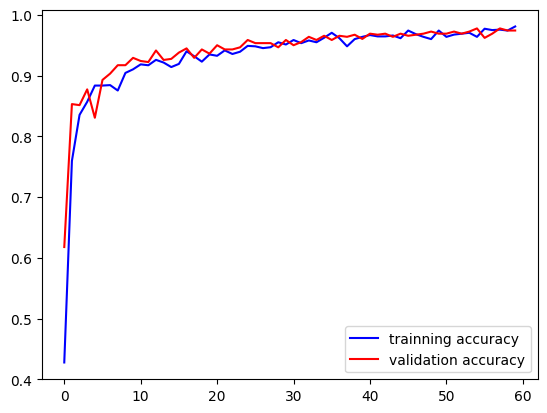

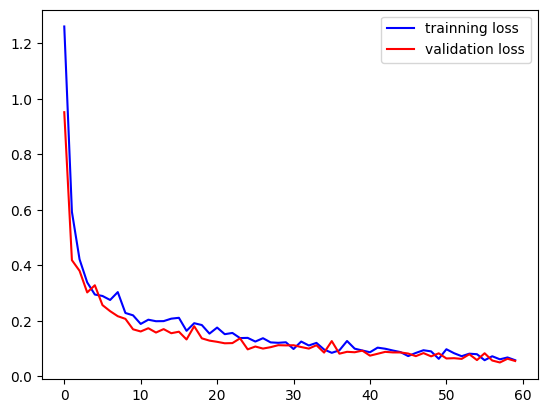

In [35]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.savefig("graph.png")
plt.show()

In [36]:
model.save("drowiness_new6.keras")

In [37]:
model.save("drowiness_new6.model")

INFO:tensorflow:Assets written to: drowiness_new6.model\assets


INFO:tensorflow:Assets written to: drowiness_new6.model\assets


In [46]:
prediction_function= model.predict(X_test)
classes_predicted = np.argmax(prediction,axis=1)

19/19 [==============================] - 15s 751ms/step


In [47]:
classes_predicted

array([3, 3, 2, 3, 1, 3, 3, 2, 1, 2, 3, 3, 3, 2, 2, 2, 3, 0, 0, 3, 3, 3,
       2, 0, 1, 2, 2, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 2, 0, 3, 3, 3, 2, 3,
       2, 2, 3, 3, 2, 3, 3, 0, 2, 1, 3, 3, 2, 2, 2, 0, 3, 3, 0, 2, 2, 3,
       2, 3, 2, 2, 1, 3, 3, 3, 2, 0, 0, 3, 0, 3, 2, 0, 3, 2, 3, 2, 2, 0,
       3, 3, 2, 3, 3, 3, 1, 0, 3, 0, 3, 3, 3, 1, 3, 1, 2, 3, 3, 1, 2, 2,
       1, 1, 2, 0, 0, 3, 3, 3, 2, 2, 3, 3, 3, 0, 1, 2, 3, 3, 2, 0, 3, 3,
       1, 3, 1, 2, 3, 3, 2, 0, 2, 2, 2, 1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 1, 2, 0, 3, 2,
       3, 3, 0, 2, 3, 0, 2, 1, 3, 2, 3, 0, 2, 0, 0, 3, 2, 2, 3, 3, 3, 0,
       3, 2, 3, 0, 2, 0, 0, 1, 2, 3, 2, 0, 3, 0, 2, 2, 2, 2, 1, 3, 1, 0,
       1, 0, 2, 3, 3, 3, 3, 0, 1, 2, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 1,
       0, 0, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 0, 2, 2, 2, 0, 3, 3, 2, 2,
       3, 2, 2, 0, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 0, 1, 0, 3, 3, 3, 3, 2,
       2, 1, 2, 2, 2, 3, 3, 0, 2, 2, 1, 3, 2, 3, 1,

In [48]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [49]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), classes_predicted, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.71      0.90      0.80        63
     no_yawn       0.90      0.72      0.80        74
      Closed       1.00      0.94      0.97       215
        Open       0.96      1.00      0.98       226

    accuracy                           0.93       578
   macro avg       0.89      0.89      0.88       578
weighted avg       0.94      0.93      0.93       578



In [50]:
model = tf.keras.models.load_model("./drowiness_new6.keras")

In [51]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas=r"C:\Prerana\Prerana PY\haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("./drowiness_new6.keras")

In [52]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

IMG_SIZE = 145

def prepare_data(filepath, face_cas=r"C:\Prerana\Prerana PY\haarcascade_frontalface_default.xml"):
    image_array = cv2.imread(filepath)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + face_cas)
    faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
    
    for (x, y, w, h) in faces:
        img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
        roi_color = img[y:y+h, x:x+w]
        roi_color = roi_color/255
        resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))

        return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [53]:
prediction_function(r"C:\Prerana\Prerana PY\train\no_yawn\2.jpg")

TypeError: 'numpy.ndarray' object is not callable